# Data Science and Business Analytics Internship
## GRIP @ The Sparks Foundation
### BY: PUTRI SABRINA



## TASK 6 - Prediction Using Decision Tree Algorithm
Create the Decision Tree Classifier and visualize it graphycally for the given 'Iris' dataset. The purpose is if we feed any new data to this classifier, it will be able to predict the right class accordingly.

## Importing the Required Libraries

In [100]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

import pydotplus
from IPython.display import Image

In [101]:
# Loading the dataset
iris=datasets.load_iris()
X=pd.DataFrame(iris.data[:, :], columns=iris.feature_names[:])
y=pd.DataFrame(iris.target,columns=["Species"])

print("Showing part of the whole dataset:")
print(X)

Showing part of the whole dataset:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


## Common Dataset Ecploration

In [102]:
X.shape

(150, 4)

In [103]:
X.duplicated().sum()

1

In [104]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [105]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [107]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [108]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Visualizations

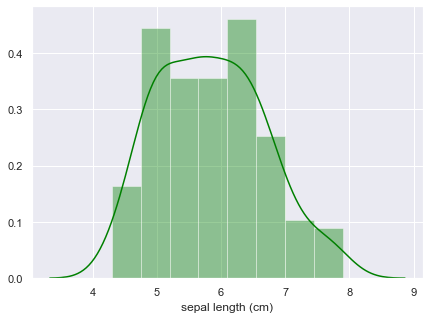

In [109]:
sns.distplot(X['sepal length (cm)'],color="green")
sns.set(rc={'figure.figsize':(7,5)})

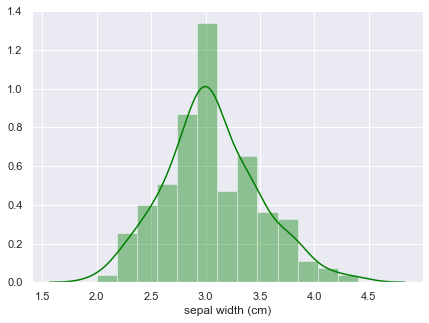

In [110]:
sns.distplot(X['sepal width (cm)'],color="green")
sns.set(rc={'figure.figsize':(7,5)})

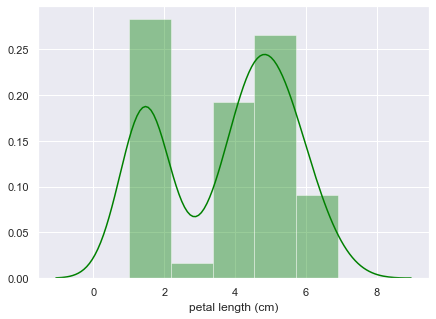

In [111]:
sns.distplot(X['petal length (cm)'],color="green")
sns.set(rc={'figure.figsize':(7,5)})

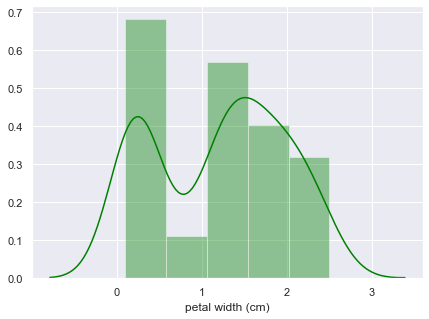

In [112]:
sns.distplot(X['petal width (cm)'],color="green")
sns.set(rc={'figure.figsize':(7,5)})

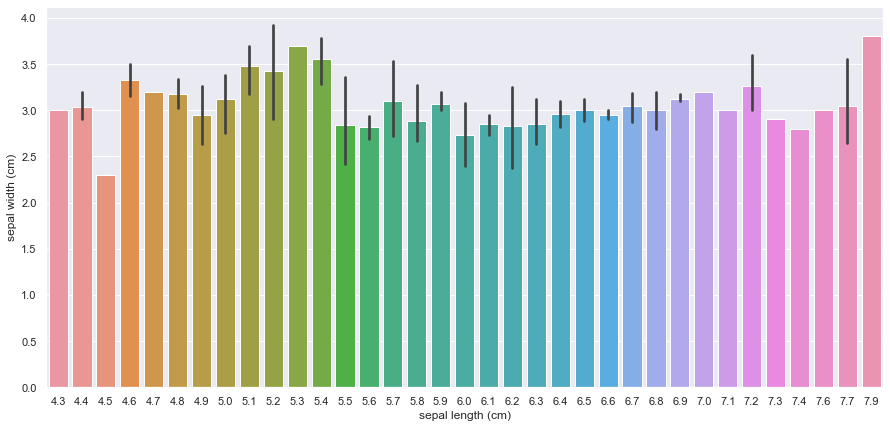

In [113]:
plt.figure(figsize=(15,7))
sns.barplot(X['sepal length (cm)'],X['sepal width (cm)'])

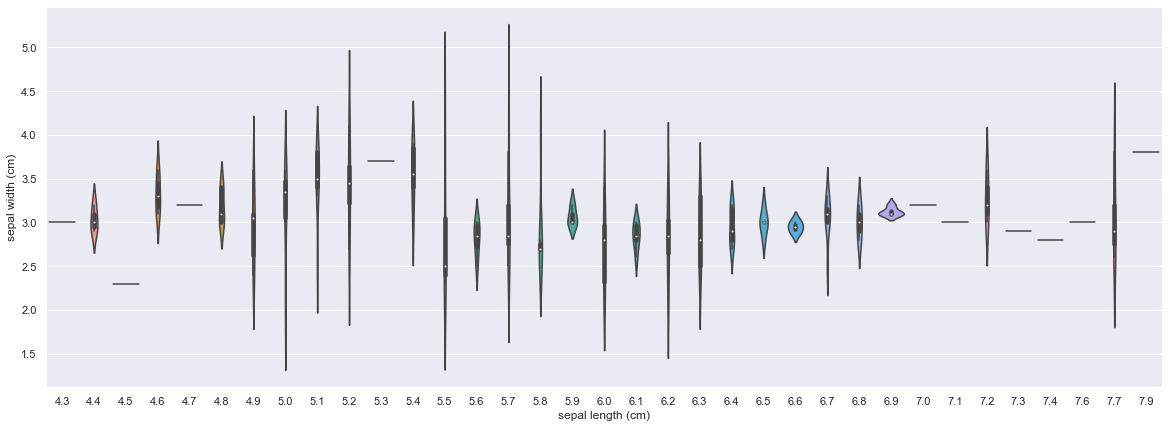

In [114]:
plt.figure(figsize=(20,7))
sns.violinplot(X['sepal length (cm)'],X['sepal width (cm)'])

## Splitting the Dataset

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [116]:
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [117]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [118]:
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
96                 5.7               2.9                4.2               1.3
105                7.6               3.0                6.6               2.1
66                 5.6               3.0                4.5               1.5
0                  5.1               3.5                1.4               0.2
122                7.7               2.8                6.7               2.0
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[100 rows x 4 columns]


In [119]:
print(y_train)

[1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2
 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1
 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]


In [120]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4
31                 5.4               3.4                1.5               0.4
64                 5.6               2.9                3.6               1.3
141                6.9               3.1                5.1               2.3
68                 6.2               2.2                4.5               1.5
82                 5.8               2.7                3.9               1.2
110                6.5               3.2                5.1               2.0
12                 4.8               3.0                1.4     

In [121]:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


In [122]:
# Feature scalling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [123]:
print(X_train)

[[-0.13835603 -0.26550845  0.22229072  0.10894943]
 [ 2.14752625 -0.02631165  1.61160773  1.18499319]
 [-0.25866563 -0.02631165  0.39595535  0.37796037]
 [-0.8602136   1.16967238 -1.39857913 -1.37061074]
 [ 2.26783585 -0.50470526  1.66949594  1.05048772]
 [-0.01804644 -0.74390206  0.16440251 -0.29456698]
 [-0.739904    0.93047557 -1.39857913 -1.37061074]
 [-0.98052319  1.16967238 -1.45646733 -1.23610527]
 [-0.8602136   1.88726279 -1.10913808 -1.1015998 ]
 [-0.98052319 -2.4182797  -0.18292674 -0.29456698]
 [ 0.58350153 -0.74390206  0.62750818  0.78147678]
 [-1.22114238  0.93047557 -1.10913808 -1.37061074]
 [-0.98052319 -0.02631165 -1.28280271 -1.37061074]
 [-0.8602136   0.69127877 -1.2249145  -0.96709433]
 [-0.25866563 -0.74390206  0.22229072  0.10894943]
 [-0.8602136   0.93047557 -1.34069092 -1.37061074]
 [-0.13835603 -0.02631165  0.22229072 -0.02555604]
 [ 2.26783585  1.88726279  1.66949594  1.31949866]
 [-1.46176157  0.45208196 -1.39857913 -1.37061074]
 [ 0.46319194 -0.26550845  0.28

In [124]:
print(X_test)

[[ 0.34288234 -0.50470526  0.51173177 -0.02555604]
 [-0.13835603  1.88726279 -1.2249145  -1.23610527]
 [ 2.26783585 -0.98309887  1.78527236  1.45400413]
 [ 0.22257275 -0.26550845  0.39595535  0.37796037]
 [ 1.1850495  -0.50470526  0.56961997  0.2434549 ]
 [-0.49928482  0.93047557 -1.34069092 -1.1015998 ]
 [-0.25866563 -0.26550845 -0.12503853  0.10894943]
 [ 1.30535909  0.21288516  0.7432846   1.45400413]
 [ 0.46319194 -1.93988609  0.39595535  0.37796037]
 [-0.01804644 -0.74390206  0.0486261  -0.02555604]
 [ 0.82412072  0.45208196  0.7432846   1.05048772]
 [-1.22114238 -0.02631165 -1.39857913 -1.50511621]
 [-0.37897522  1.16967238 -1.45646733 -1.37061074]
 [-1.10083279  0.21288516 -1.34069092 -1.50511621]
 [-0.8602136   1.88726279 -1.34069092 -1.23610527]
 [ 0.58350153  0.69127877  0.51173177  0.51246584]
 [ 0.82412072 -0.02631165  1.14850206  1.31949866]
 [-0.25866563 -1.22229567  0.0486261  -0.16006151]
 [-0.13835603 -0.50470526  0.39595535  0.10894943]
 [ 0.70381112 -0.50470526  1.03

## Defining the Decision Tree Algorithm

Fitting Decision Tree Classification to the Training set:

In [125]:
dtc=DecisionTreeClassifier(criterion='entropy', random_state=0)
model=dtc.fit(X_train,y_train)

print("Decision Tree Classifier Created Successfully")

Decision Tree Classifier Created Successfully


## Predicting a New Value

Predicting the Test set results:

In [126]:
y_pred=dtc.predict(X_test)
print("Predicted Values:")
print(y_pred)

Predicted Values:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [127]:
print("Accuracy Score:", accuracy_score(y_pred,y_test))

Accuracy Score: 0.98


## Constructing Confusion Matrix

In [128]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

## Visualizing the Result

In [129]:
dot_data=tree.export_graphviz(model,out_file=None,
                             feature_names=iris.feature_names,
                             class_names=iris.target_names)

In [130]:
graph=pydotplus.graph_from_dot_data(dot_data)

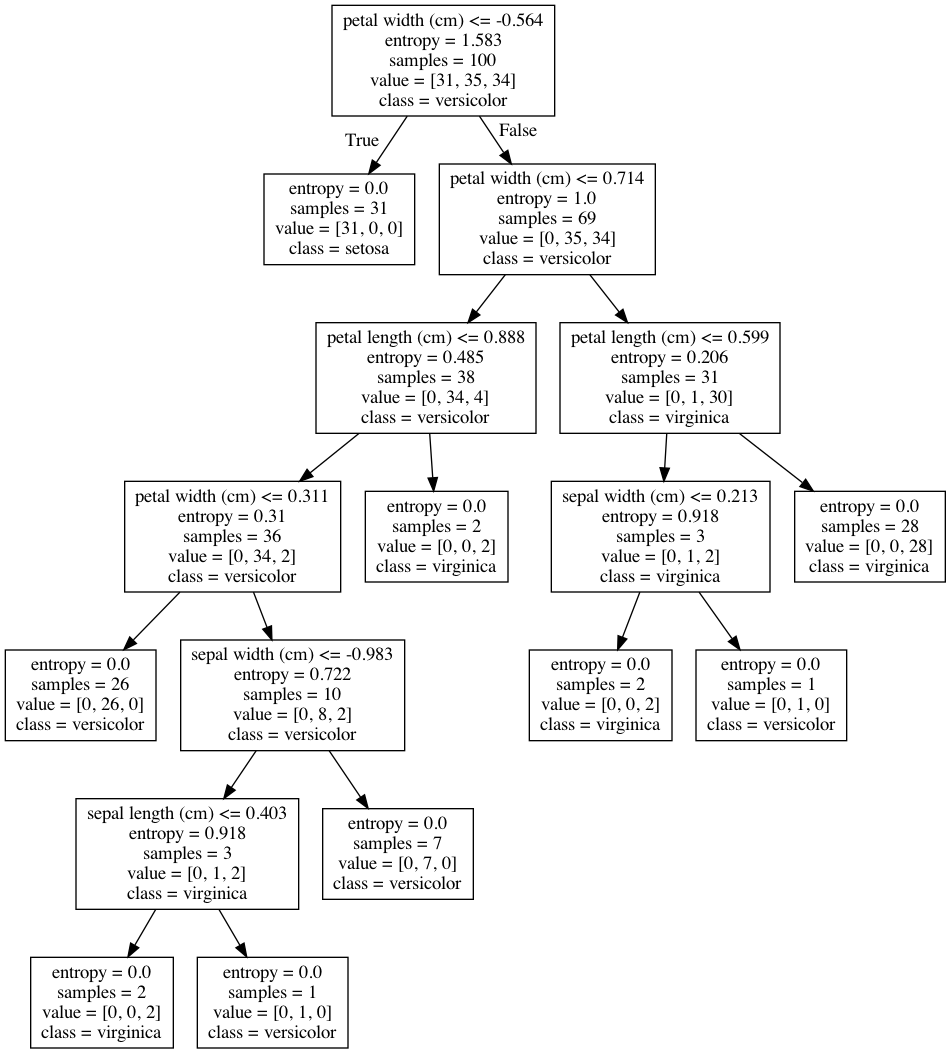

In [131]:
Image(graph.create_png())